In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = () => 0

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("./datasets/characters.csv")

## Simple data visualisation

In [4]:
def simple_visualisation(column):
    fig, ax = plt.subplots(1, 2, figsize=(12,5), gridspec_kw={"width_ratios": [3, 5]})
    fig.suptitle(f"Playable character distribution by {column}", fontsize=16)
    ax[0].set_title("Current", fontweight="bold", pad=20)
    ax[1].set_title("Historical", fontweight="bold", pad=20)

    group_sizes = df.groupby(column, as_index=False).size()

    ax[0].pie(group_sizes["size"], labels=group_sizes[column], autopct="%1.1f%%")

    for column_val in group_sizes[column]:
        column_val_by_date = df[getattr(df, column) == column_val].groupby("release").size()

        for date in reversed(column_val_by_date.axes[0]):
            column_val_by_date[date] = column_val_by_date[column_val_by_date.axes[0] <= date].values.sum()

        x_axis = list(map(dt.datetime.strptime, column_val_by_date.axes[0], len(column_val_by_date.axes[0]) * ["%Y-%m-%d"]))
        y_axis = column_val_by_date.values.tolist()
        x_axis.append(dt.date.today())
        y_axis.append(y_axis[len(y_axis) - 1])
        ax[1].step(x_axis, y_axis, label=column_val)

    fig.tight_layout()
    plt.show()

    print(group_sizes)

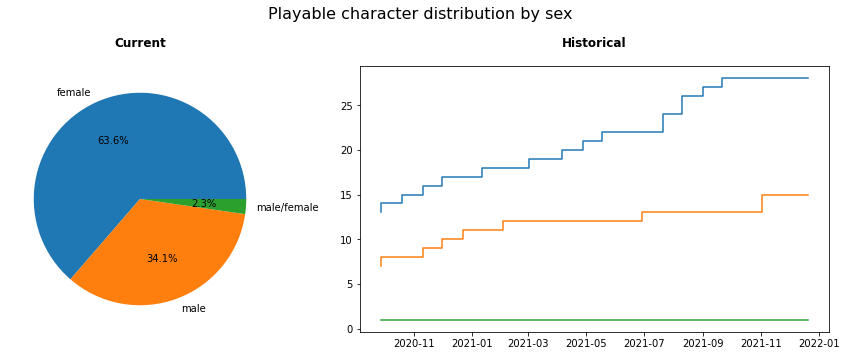

           sex  size
0       female    28
1         male    15
2  male/female     1


In [5]:
simple_visualisation("sex")

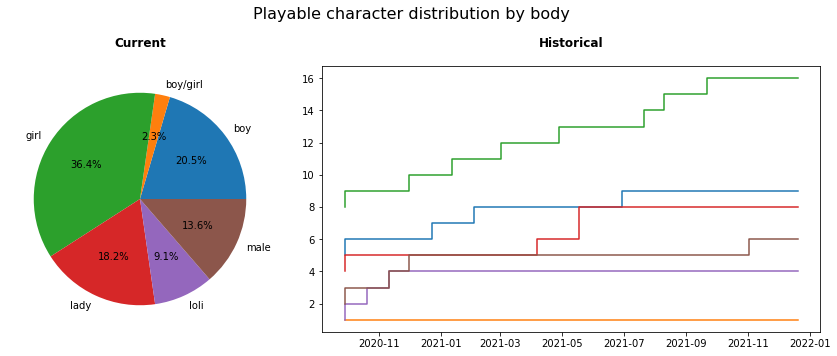

       body  size
0       boy     9
1  boy/girl     1
2      girl    16
3      lady     8
4      loli     4
5      male     6


In [6]:
simple_visualisation("body")

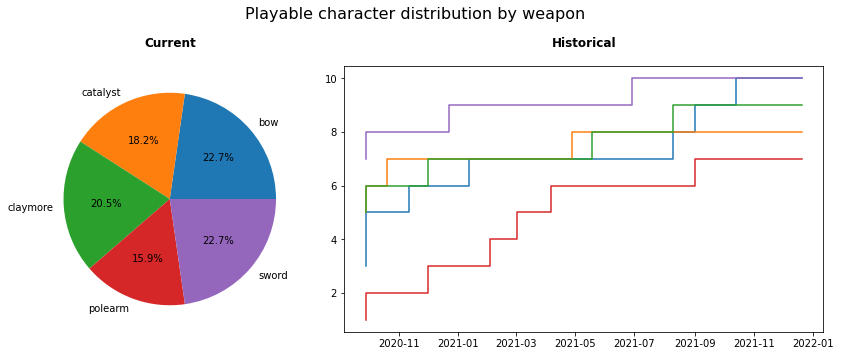

     weapon  size
0       bow    10
1  catalyst     8
2  claymore     9
3   polearm     7
4     sword    10


In [7]:
simple_visualisation("weapon")

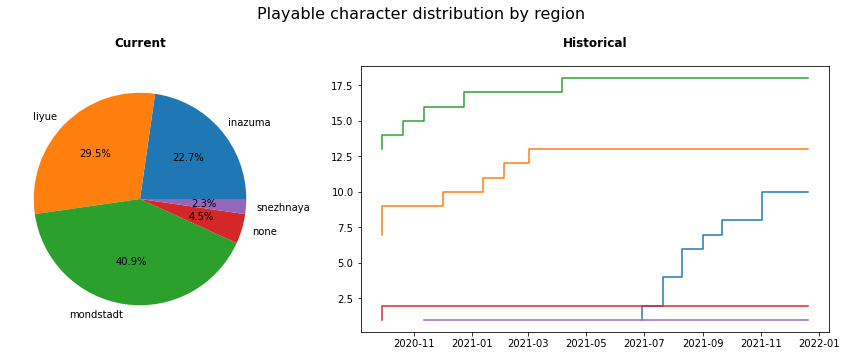

      region  size
0    inazuma    10
1      liyue    13
2  mondstadt    18
3       none     2
4  snezhnaya     1


In [8]:
simple_visualisation("region")

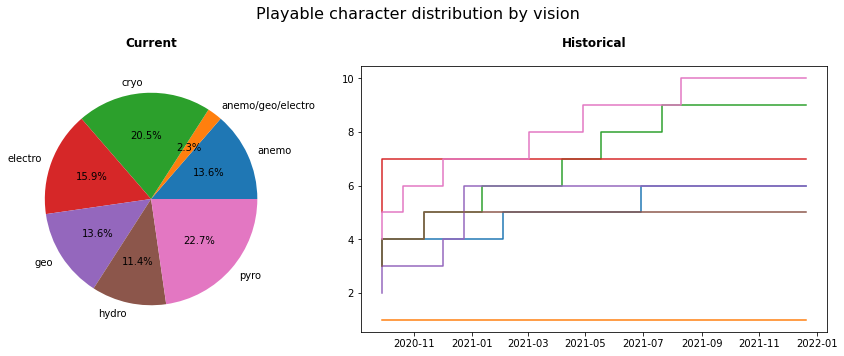

              vision  size
0              anemo     6
1  anemo/geo/electro     1
2               cryo     9
3            electro     7
4                geo     6
5              hydro     5
6               pyro    10


In [9]:
simple_visualisation("vision")

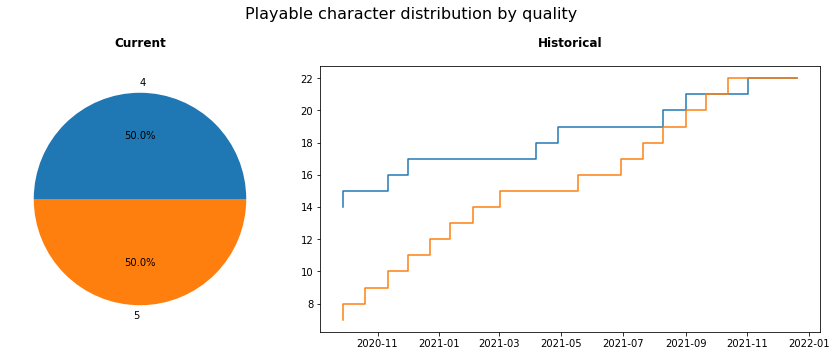

   quality  size
0        4    22
1        5    22


In [10]:
simple_visualisation("quality")

## Just having fun

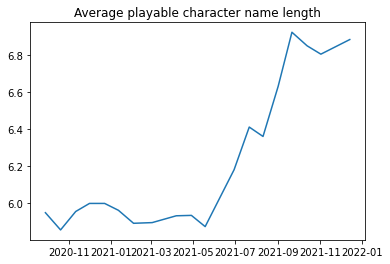

In [11]:
avg_name_length_per_date = []

for date in df.sort_values("release", ascending=False)["release"].unique():
    avg_name_length_per_date.append((date, df[df.release <= date]["name"][df.name != "traveller"].apply(len).mean()))

avg_name_length_per_date.reverse()
avg_name_length_per_date = np.array(avg_name_length_per_date)
x_axis = list(map(dt.datetime.strptime, avg_name_length_per_date[:,0], avg_name_length_per_date.shape[0] * ["%Y-%m-%d"]))
y_axis = list(map(float, avg_name_length_per_date[:,1]))
plt.plot(x_axis, y_axis)
plt.title("Average playable character name length")
plt.show()